In [1]:
import sys
import os
import logging

# To‘g‘ri yo‘lni sys.path ga qo‘shish
sys.path.append(r"C:\Users\Rasulbek907\Desktop\Project_MP\Source")

# Fayl nomi: Auto_Pipeline.py, shuning uchun import ham shunday bo'lishi kerak
from pipeline import DataLoader

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\auto_pipeline.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# Ma'lumot faylining manzili
data_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection\Filtered_Featuress.csv"

try:
    logging.info("Ma'lumot fayli yuklanmoqda...")
    df = DataLoader.load_csv(data_path)
    logging.info(f"Fayl muvaffaqiyatli yuklandi. Satrlar soni: {len(df)}, ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"Ma'lumot faylini yuklashda xatolik yuz berdi: {e}")


In [2]:
import sys
import os
import importlib

# 1. path qo‘shish
source_path = r'C:\Users\Rasulbek907\Desktop\Project_MP\Source'
if source_path not in sys.path:
    sys.path.append(source_path)

# 2. Import va reload
import pipeline
importlib.reload(pipeline)  # 🔄 MUHIM: o‘zgargan faylni yangilaydi

# 3. DataLoader ni olish
from pipeline import DataLoader

# 4. Foydalanish
data_path = r'C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection\Filtered_Featuress.csv'
loader = DataLoader(data_path)

# 5. Endi ishlaydi!
df = loader.load_dataset()
print(df.head()) 

   Unnamed: 0.1  Unnamed: 0  Video ID  Video Title  Channel  Published Date  \
0             0           0        26         4388     2187        0.988754   
1             1           1      1447         2374     4507        0.898341   
2             2           2      3989         2973     4820        0.910707   
3             3           3      7437         7301     3101        0.944730   
4             4           4      2123         7961     1298        0.892396   

     Views  Likes  Comments  Subscribers  ...  Category_Cluster_x  Year  \
0    34727    686        16      4190000  ...                   2  2025   
1    45151   1514        21       188000  ...                   2  2025   
2   353713   6485       127        37300  ...                   2  2025   
3  2171652  78431       183        43800  ...                   1  2025   
4   246429   9321       949      2490000  ...                   0  2025   

   Month  Day  DayOfWeek   DayName  Views_per_Sub  Engagement  Like_per_Su

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8493 entries, 0 to 8492
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        8493 non-null   int64  
 1   Unnamed: 0          8493 non-null   int64  
 2   Video ID            8493 non-null   int64  
 3   Video Title         8493 non-null   int64  
 4   Channel             8493 non-null   int64  
 5   Published Date      8493 non-null   float64
 6   Views               8493 non-null   int64  
 7   Likes               8493 non-null   int64  
 8   Comments            8493 non-null   int64  
 9   Subscribers         8493 non-null   int64  
 10  Channel Views       8493 non-null   int64  
 11  Country             8493 non-null   int64  
 12  Region              8493 non-null   int64  
 13  CategoryID          8493 non-null   int64  
 14  CategoryName        8493 non-null   int64  
 15  Cluster             8493 non-null   int64  
 16  Catego

In [4]:
df.head()


,Unnamed: 0.1,Unnamed: 0,Video ID,Video Title,Channel,Published Date,Views,Likes,Comments,Subscribers,...,Category_Cluster_x,Year,Month,Day,DayOfWeek,DayName,Views_per_Sub,Engagement,Like_per_Sub,Comment_per_Sub
0,0,0,26,4388,2187,0.988754,34727,686,16,4190000,...,2,2025,10,20,0,0.166667,0.008288,0.020214,0.000164,0.000004
1,1,1,1447,2374,4507,0.898341,45151,1514,21,188000,...,2,2025,10,16,3,0.666667,0.240164,0.033996,0.008053,0.000112
2,2,2,3989,2973,4820,0.910707,353713,6485,127,37300,...,2,2025,10,17,4,0.000000,9.482668,0.018693,0.173856,0.003405
3,3,3,7437,7301,3101,0.944730,2171652,78431,183,43800,...,1,2025,10,18,5,0.333333,49.579964,0.036200,1.790621,0.004178
4,4,4,2123,7961,1298,0.892396,246429,9321,949,2490000,...,0,2025,10,16,3,0.666667,0.098967,0.041675,0.003743,0.000381


In [3]:
from auto_pipeline import PlayerPipeline
from sklearn.ensemble import RandomForestClassifier

# Avto Pipeline RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


pipeline_rf = PlayerPipeline(df=df, target="CategoryName", model=RandomForestClassifier(n_estimators=100, random_state=42))

pipeline_rf.fit()
y_pred = pipeline_rf.predict()

accuracy = accuracy_score(pipeline_rf.y_test, y_pred)
print("✅ Accuracy:", round(accuracy, 4))

✅ Accuracy: 1.0


In [5]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\RandomForestClassifier.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_rf, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}")  

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\RandomForestClassifier.joblib


# Avto Pipeline DecisionTreeRegressor

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

pipeline_dt = PlayerPipeline(df=df, target="CategoryName", model=DecisionTreeClassifier(random_state=42))
pipeline_dt.fit()

y_pred = pipeline_dt.predict()

accuracy = accuracy_score(pipeline_dt.y_test, y_pred)
print("✅ Accuracy:", round(accuracy, 4))

✅ Accuracy: 1.0


In [7]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\DecisionTreeClassifier.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_dt, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}")  

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\DecisionTreeClassifier.joblib


# Avto Pipeline LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


pipeline_lr = PlayerPipeline(df=df, target="CategoryName", model=LogisticRegression(max_iter=1000, random_state=42))
pipeline_lr.fit()
y_pred = pipeline_lr.predict()

accuracy = accuracy_score(pipeline_lr.y_test, y_pred)
print("✅ Logistic Regression Accuracy:", round(accuracy, 4))

✅ Logistic Regression Accuracy: 0.9953


In [10]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\LogisticRegression.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_lr, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}")  

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\LogisticRegression.joblib


# Avto Pipeline XGBClassifier

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Pipeline yaratish
pipeline_xgb = PlayerPipeline(
    df=df,
    target="CategoryName",
    model=XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
)
pipeline_xgb.fit()
y_pred = pipeline_xgb.predict()


accuracy = accuracy_score(pipeline_xgb.y_test, y_pred)
print("✅ XGBoost Accuracy:", round(accuracy, 4))

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:48:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 1.0


In [13]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\XGBClassifier.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_xgb, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}")  

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\XGBClassifier.joblib


# Natijalarni Taqqoslash 

🔧 Training RandomForest ...
✅ RandomForest Accuracy: 100.0%
🔧 Training DecisionTree ...
✅ DecisionTree Accuracy: 100.0%
🔧 Training LogisticRegression ...
✅ LogisticRegression Accuracy: 99.53%
🔧 Training XGBoost ...


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:51:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 100.0%


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_17068\1091674028.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_17068\1091674028.py:62: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


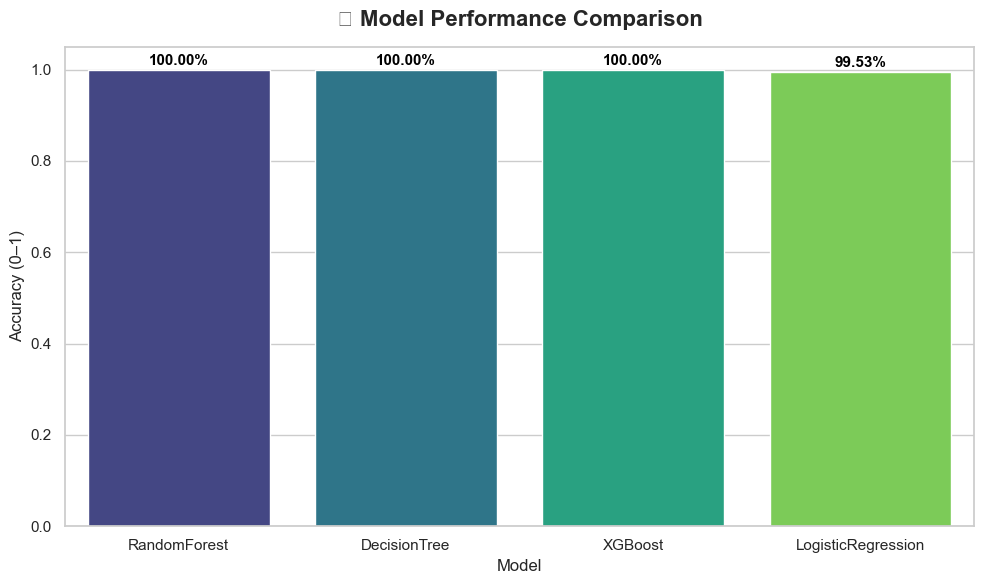

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 🔹 Model ro‘yxati
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# 🔹 Natijalarni saqlash
results = []

# 🔹 Har bir modelni o‘qitish va aniqlikni o‘lchash
for name, model in models.items():
    print(f"🔧 Training {name} ...")
    pipeline = PlayerPipeline(df=df, target="CategoryName", model=model)
    pipeline.fit()
    y_pred = pipeline.predict()
    acc = accuracy_score(pipeline.y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    print(f"✅ {name} Accuracy: {round(acc * 100, 2)}%")

# 🔹 DataFrame shaklida natijalar
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)

# 🎨 Grafik chizish (Seaborn bilan)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=results_df,
    x="Model",
    y="Accuracy",
    palette="viridis",
    saturation=0.9
)

# 📊 Natijalarni ustiga yozish
for i, row in enumerate(results_df.itertuples()):
    plt.text(i, row.Accuracy + 0.01, f"{row.Accuracy*100:.2f}%", 
             ha='center', fontsize=11, weight='bold', color='black')

plt.title("🎯 Model Performance Comparison", fontsize=16, weight='bold', pad=15)
plt.ylabel("Accuracy (0–1)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
